this is an outline notebook- sections are suggested steps, but more or less steps can be followed to reach your end goal

# Classification problem - predicting the take up of a credit card offer 

The bank wants to better understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card. You have been challenged to predict whether a customer will or wont accept the offer using a machine learning model. 

**Our main question is: <br/>**
*Will the customer accept the credit card offer? Y/N*


The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Reward Type:** air miles, cash back or points... what type of credit card rewards the customer takes
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


Be careful- the data is imbalanced towards customers who say No to the offer. This imbalance would have to be managed with sampling methods. 

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Read data as a pandas data frame, preview top 10 rows

In [2]:
df=pd.read_csv('creditcardmarketing.csv')

In [3]:
df.head(10)

,Customer_number,Offer_Accepted,Reward_Type,Mailer_Type,Income,No_open_bank_accounts,Overdraft_protection,Credit_rating,No_credit_cards,Homes_owned,Household_size,Own_your_home?,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [4]:
df['Offer_Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

# Exploratory Data Analysis

In this part we want to familirize ourselves with the data set. We are going to look at the following steps:
- assess dataframe 
- shape, dtypes, summary statistics
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data
- outliers 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        18000 non-null  int64  
 1   Offer_Accepted         18000 non-null  object 
 2   Reward_Type            18000 non-null  object 
 3   Mailer_Type            18000 non-null  object 
 4   Income                 18000 non-null  object 
 5   No_open_bank_accounts  18000 non-null  int64  
 6   Overdraft_protection   18000 non-null  object 
 7   Credit_rating          18000 non-null  object 
 8   No_credit_cards        18000 non-null  int64  
 9   Homes_owned            18000 non-null  int64  
 10  Household_size         18000 non-null  int64  
 11  Own_your_home?         18000 non-null  object 
 12  Average_Balance        17976 non-null  float64
 13  Q1_balance             17976 non-null  float64
 14  Q2_balance             17976 non-null  float64
 15  Q3

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        17976 non-null  int64  
 1   Offer_Accepted         17976 non-null  object 
 2   Reward_Type            17976 non-null  object 
 3   Mailer_Type            17976 non-null  object 
 4   Income                 17976 non-null  object 
 5   No_open_bank_accounts  17976 non-null  int64  
 6   Overdraft_protection   17976 non-null  object 
 7   Credit_rating          17976 non-null  object 
 8   No_credit_cards        17976 non-null  int64  
 9   Homes_owned            17976 non-null  int64  
 10  Household_size         17976 non-null  int64  
 11  Own_your_home?         17976 non-null  object 
 12  Average_Balance        17976 non-null  float64
 13  Q1_balance             17976 non-null  float64
 14  Q2_balance             17976 non-null  float64
 15  Q3

## Visualisations

We want to visualise the relationships between between the different features in the data.

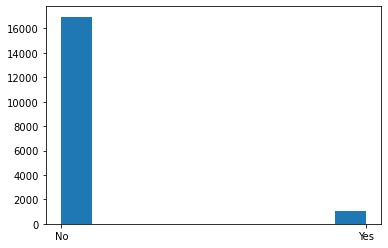

In [12]:
# how many accepted the offer vs who didn't

plt.hist(df['Offer_Accepted']);

In [ ]:
# what's the avg balance of customers who accepted the offer vs who didn't


In [ ]:
# how do the different income levels of who accepted the offer compare with those who didn't


In [ ]:
# how does yes/no look with the number of homes owned


Let's see the relationship between the quarters and offer accepted.

In [ ]:
# what's the q1 balance of customers who accepted the offer vs who didn't


In [ ]:
# what's the q2 balance of customers who accepted the offer vs who didn't


In [ ]:
# what's the q3 balance of customers who accepted the offer vs who didn't


In [ ]:
# what's the q4 balance of customers who accepted the offer vs who didn't



# Cleaning & Wrangling

**Tasks**
- drop 'customer_number' column
- drop null values
- convert float columns to int

In [ ]:
# before cleaning, create a copy of the dataframe


In [ ]:
# drop customer_number column


In [ ]:
# drop rows with missing values


In [ ]:
# converting columns from float to int


In [ ]:
# test using info()


# Preprocessing

**Tasks:**
- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)
- normalizer
- encoding into dummies

In [ ]:
# split numerical and categorical data into two dataframes


In [ ]:
#correlation matrix for numerical columns -any highly correlated pairs we should drop ? 


In [ ]:
#scaling numerical columns with normalizer if needed 


In [ ]:
#encoding categorical features if needed 


# split off the dependant class (label)


In [ ]:
# drop target class from X 

In [ ]:
# define the target y


In [ ]:
#checking the len of x_normalized & cat_clean before merging back together in X


In [ ]:
# bring the numerical data (scaled)in with the categorical using concat



# Modelling

**- iteration 1 (X)**

In our first iteration we only used preprocessing and encoding, we use this as a benchmark for the next iterations to compare to.

**- iteration 2 (X_i2)**

SMOTE sampling to improve the imbalance of the target
drop some selected columns 

**- iteration 3 (X_i3)**

example - dropping quarterly balance columns to reduce noise, encode numerical features to categories as appropriate 
implementing KNN or decision tree



## Modeling (X)

In [ ]:
#import model


### Test & Train

In [ ]:
#train test split - splitting X and y each into 2 data sets(train data and test data)


In [ ]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()



In [ ]:
#perform prediction on the test set using predict()


In [ ]:
#check the predictions array


### Accuracy metrics and visuals

In [ ]:
#calculating the accuracy score


#### Confusion matrix

#### ROC/AUC

**ROC Curve**
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- the closer to left hand corner the better
- should not be below 0.5 (random) 'red' line

**AUC** - area under the curve the bigger the area under the curve the better the model
1 represents perfect classifier, and 0.5 represents a worthless classifier.<br/>



## Modeling (X_i2)

In [ ]:
#drop selected columns 



In [ ]:
# import needed libraries


In [ ]:
#define smote variable


In [ ]:
#recreate X and y applying smote


### Test & Train

In [ ]:
#redo train test split it2


In [ ]:
#apply model it2 


### Accuracy metrics and visuals

#### Confusion matrix

#### ROC

**Comparision accuracy and recall it1 and it2**

accuracy it1 = 
accuracy it2 = 



## Modeling (X_i3)

### Test and Train 

### Accuracy metrics and visuals

#### Confusion matrix

**Comparision confusion matrix it1, it2, it3




#### ROC

**Comparision ROC & AUC it1, it2 and it3 



# Findings and Conclusion


